# Learning Earthkit

#### This notebook follows the Youtube tutorial from ECMWF's Online Computing Training Week 2024 and aims at creating a NB that documents the work presented there.

#### Youtube tutorial: https://youtu.be/sPQufS2z_c8?si=Ikg7-6MaCun0r0iG

#### It is assumed that you have downloaded the earthkit package i.e. pip install earthkit. For install information see minutes >42 of the tutorial and https://github.com/ecmwf/earthkit page.

Contact: Oğul Öncel, https://github.com/ooncel

## Important points from introduction (0-12 mins.)

Earthkit
- is structured as interoperable but independent Python components, where each component has a narrow task but does it throughly and completely.
- handles geospatial data in a format-agnostic manner.
  - can access, retrive, modify and process data.
- is expected to be used by research scientists in their work 
- will replace Metview in the future

## Examples from Earthkit-{data/meteo/regrid} (12-28 mins.)

### Earthkit Data

In [5]:
# Getting a dataset
import earthkit.data

# Read-in from a data source 
# Note: The example file t_pl on Slide 13 does not exist. Use https://get.ecmwf.int/#browse/browse to see available datasets. I start from
#       test6.grib that is used later in the tutorial.
# It is also possible to retrive data from other services this way.
ds=earthkit.data.from_source("url","https://get.ecmwf.int/repository/test-data/earthkit-data/examples/test6.grib")

print(len(ds))
ds.ls()

6


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,t,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll
1,ecmf,u,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll
2,ecmf,v,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll
3,ecmf,t,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll
4,ecmf,u,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll
5,ecmf,v,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll


In [3]:
# Concept of 'stream': You can process all data in memory, without accessing to disk.
ds=earthkit.data.from_source("url","https://get.ecmwf.int/repository/test-data/earthkit-data/examples/test6.grib",stream=True)
for f in ds:
    print(f) # Consume stream in a loop

len([f for f in ds]) # Note that stream has been consumed, no further content to read.

GribField(t,1000,20180801,1200,0,0)
GribField(u,1000,20180801,1200,0,0)
GribField(v,1000,20180801,1200,0,0)
GribField(t,850,20180801,1200,0,0)
GribField(u,850,20180801,1200,0,0)
GribField(v,850,20180801,1200,0,0)


0

In [6]:
# Data content can be converted into Numpy, Pandas etc.
a = ds.to_numpy()
a.shape

(6, 7, 12)

In [7]:
# Field type data (gridded continuous measurements) sorting and filtering

In [8]:
r = ds.sel(param=["u","v"]).order_by(level="ascending") 
# u and v stands for, zonal wind (west–east component) and meridional wind (south–north component), respectively.
r.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20180801,1200,0,an,0,regular_ll
2,ecmf,u,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll
3,ecmf,v,isobaricInhPa,1000,20180801,1200,0,an,0,regular_ll


### Earthkit-Meteo
- Collection of meteorological computations s.a. thermodynamics, wind etc.
- Assumes numpy array as input

In [9]:
from earthkit.meteo import thermo
import numpy as np

Potential temperature is defined as:
$$ \theta = T \left( \frac{p_0}{p} \right)^{\kappa} $$ where $$ \kappa = \frac{R}{c_p}\approx 0.286 \ \text{(dry air)}, \ p_0=1000 \ \text{hPa} $$ 


In [10]:
t = np.array([264.12,261.45]) # Kelvins
p = np.array([850,850])*100 # Pascals
theta = thermo.potential_temperature(t,p)

In [11]:
print(theta)

[276.672291   273.87539937]


### Earthkit-data with earthkit-meteo

In [12]:
# It is assumed that you have API access: pip install cdsapi

In [13]:
import earthkit.data as ekd
from earthkit.meteo.thermo import relative_humidity_from_specific_humidity

In [14]:
import cdsapi
# NB: This only works once you accept terms and condition on webpage 
#     https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=download#manage-licences

# T = Temperature (K), q = specific heat (kg/kg)
ds = ekd.from_source("cds","reanalysis-era5-pressure-levels",variable=["t","q"],pressure_level=[700,850],
                     product_type="reanalysis",area=[50,-10,40,10], grid=[2,2],date="2012-05-10",time="12:00")

2025-08-26 18:17:44,936 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-26 18:17:45,090 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-08-26 18:17:45,271 INFO Request ID is 29f0b559-14fb-4d08-9d47-f6337ba53914
2025-08-26 18:17:45,371 INFO status has been updated to accepted
2025-08-26 18:17:58,944 INFO status has been updated to successful
                                                                                

In [15]:
# Check how the dataset looks like
print(len(ds))
ds.ls()


4


,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,t,isobaricInhPa,700,20120510,1200,0,an,0,regular_ll
1,ecmf,q,isobaricInhPa,700,20120510,1200,0,an,0,regular_ll
2,ecmf,t,isobaricInhPa,850,20120510,1200,0,an,0,regular_ll
3,ecmf,q,isobaricInhPa,850,20120510,1200,0,an,0,regular_ll


In [16]:
# Extract fields on 700 hPa
t = ds.sel(param="t",level=700)[0] # Getting first field element helps with bypassing Metadata and only getting the raw value
q = ds.sel(param="q",level=700)[0]
p = 700 * 100. # hPa -> Pa

- Relative humidity definition:  
  $$RH = 100 \times \frac{e}{e_s}$$


- with e being actual vapour pressure:  
  $$e = q \cdot \frac{p}{\varepsilon + (1 - \varepsilon)q}$$

- and $e_s$ being the saturation vapour pressure ($T$ in K):  

  $$e_s = 611.2 \, \exp \left( \frac{17.67 \, (T - 273.15)}{T - 29.65} \right)$$

- Constants:  
  - $q$ = specific humidity (kg/kg)  
  - $p$ = pressure (Pa)  
  - $T$ = temperature (K)  
  - $\varepsilon = \tfrac{R_d}{R_v} \approx 0.622$  

In [17]:
# Compute relative humidity
r_new = relative_humidity_from_specific_humidity(t.values,q.values,p)
r_new.shape

(66,)

In [18]:
r_new[:3]

array([25.99026698, 43.65231922, 62.53942672])

In [19]:
# Create new field with modified values and metadata
meta_new = t.metadata().override(shortName="r")
ds_new = ekd.FieldList.from_array(r_new,meta_new)
ds_new.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,r,isobaricInhPa,700,20120510,1200,0,an,0,regular_ll


### Earthkit-regrid

- Using pre-generated interpolation matrices, hosted at ECWMF.

In [20]:
import os
from earthkit.regrid import interpolate
from earthkit.data import from_source

ds = from_source("url","https://get.ecmwf.int/repository/test-data/earthkit-regrid/examples/H8_nested_multi.grib2")

In [21]:
out_grid = {"grid":[5,5]}

In [22]:
r = interpolate(ds, out_grid=out_grid,method="linear")

In [23]:
d=r.data()

In [24]:
lat=d[0]
lon=d[1]
vals=d[2:]
lat.shape, lon.shape, vals.shape

((37, 72), (37, 72), (2, 37, 72))

## Examples from Earthkit-plots (28-42 mins.)
- Plotting component of Earthkit.
- Shortcuts, convenient unit conversion, automatic styles based on metadata..
- It can also visualize data from shapefiles, GeoJSON and image formats.

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/earthkit/plots/quickmap.py:23: UserWarning: The quickmap module is deprecated and will be removed in earthkit-plots 0.4. Please use the quickplot module instead.
  warnings.warn(
ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


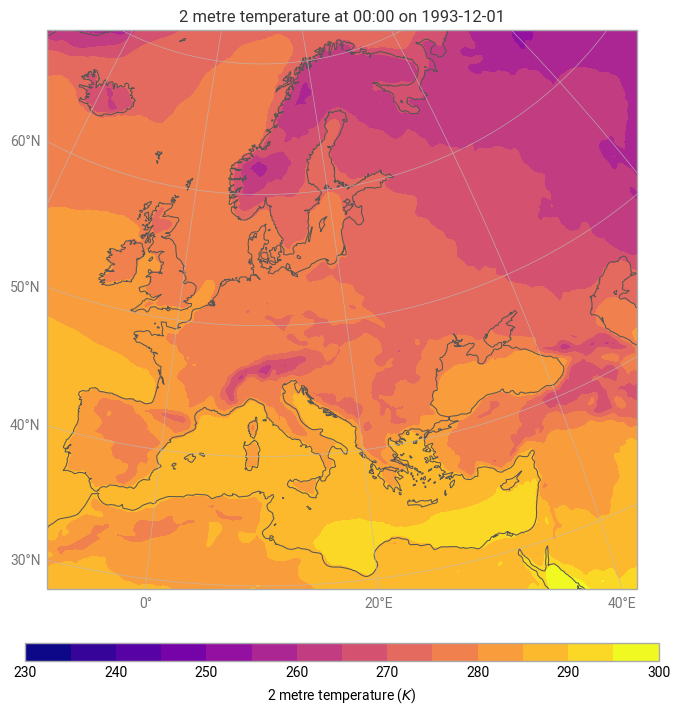

In [25]:
# Basic example
import earthkit.data
import earthkit.plots.quickmap as qmap

data = earthkit.data.from_source("sample","era5-monthly-mean-2t-199312.grib")
qmap.plot(data,domain="Europe",units="celcius")

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/earthkit/plots/quickmap.py:23: UserWarning: The quickmap module is deprecated and will be removed in earthkit-plots 0.4. Please use the quickplot module instead.
  warnings.warn(


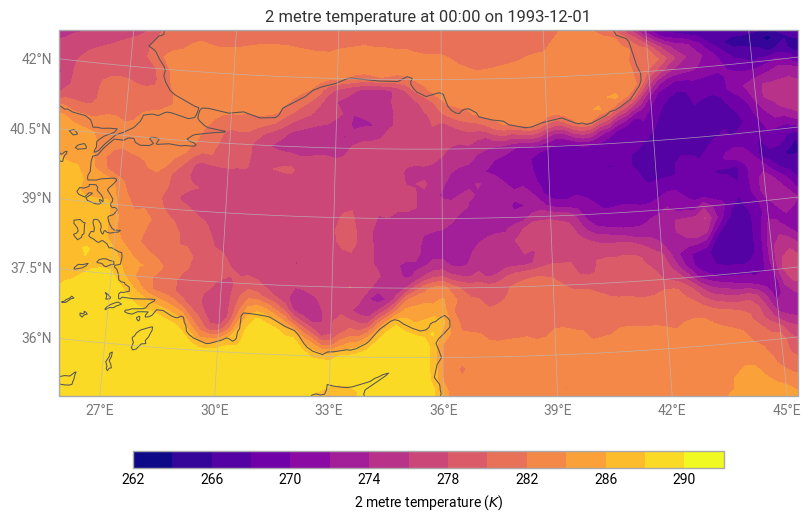

In [26]:
qmap.plot(data,domain="Turkey",units="celcius")

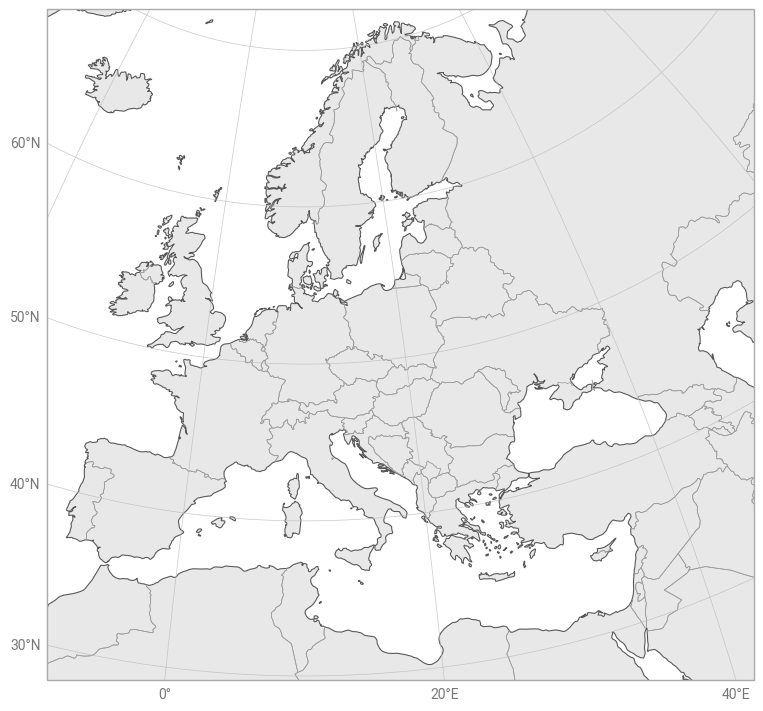

In [27]:
# Domains and coordinate reference systems
chart = earthkit.plots.Map(domain="Europe")
chart.standard_layers()
chart.show()

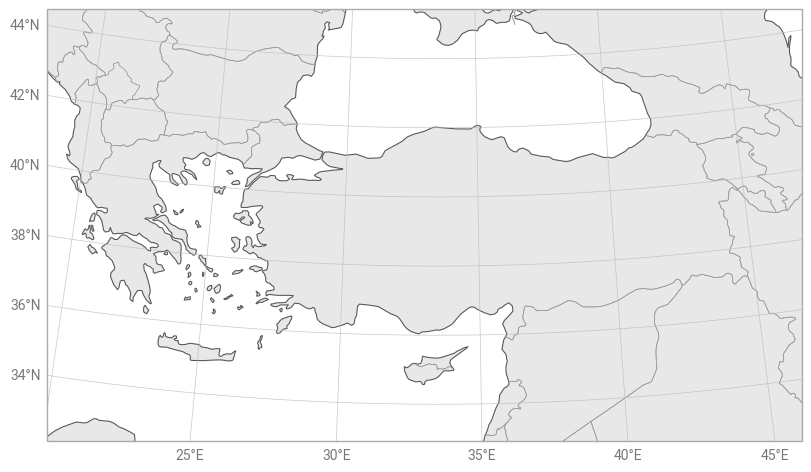

In [28]:
# Choose multiple countries as domain
chart = earthkit.plots.Map(domain=["Greece","Turkey"])
chart.standard_layers()
chart.show()

/opt/homebrew/Cellar/jupyterlab/4.3.6/libexec/lib/python3.13/site-packages/earthkit/plots/components/subplots.py:1126: UserWarning: block is deprecated and will be removed in a future release. Please use grid_cells instead.
  warnings.warn(


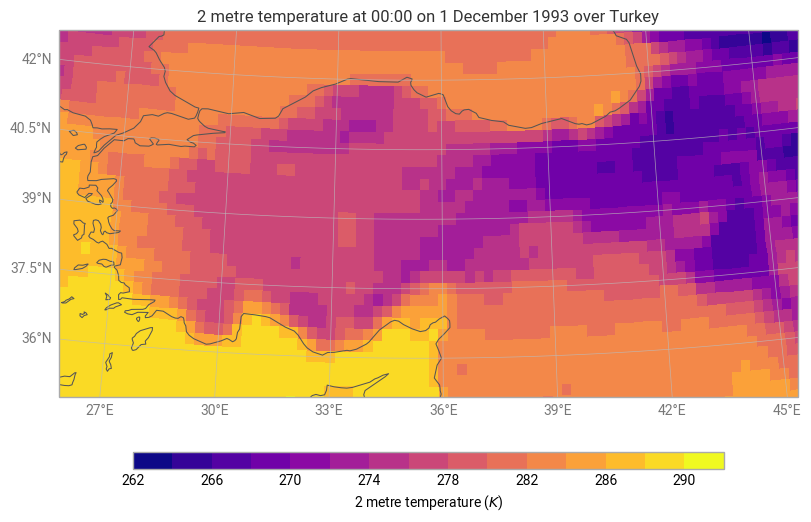

In [29]:
# Demonstrating various functionalities
chart = earthkit.plots.Map(domain="Turkey")
chart.block(data,units="K")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.title("{variable_name} at {time:%H:%M on %-d %B %Y} over {domain}")
chart.show()